# Travelling Salesman Problem using Genetic Algorithm

### Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
from itertools import permutations, combinations
from random import shuffle
import random
import numpy as np
import statistics
import pandas as pd
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

## Data

### Cities Coordinates and Algorithm Parameters

In [ ]:
x = [-5.16992,-5.18299,-5.18717,-5.19008,-5.1724,-5.15648,-5.16799,-5.17053,-5.17876,-5.17487,-5.17774,-5.16838,-5.17758,-5.20561,-5.17863,-5.18121,-5.18557,-5.17063, -5.16852,-5.17323]
y = [119.44766,119.44767,119.45603,119.41641,119.44828,119.41471,119.45341,119.44264,119.43459,119.40671,119.42831,119.41802,119.42829,119.44873,119.40675,119.43237,119.42406,119.41714,119.41937,119.41585
]
cities_names = ["ASSYIFA SALON", "INNER V SALON", "MAHA SURYA TOKO", "NONA COSMETIK", "RAHRA SALON", "RIAS TOKO", "WATNIS SALON", "YASMIN SALON", "ADHEL SALON", "ANI SALON","BARY 2 GOWA SALON","BEAUTY 8 SALON","BEN ART MANURUKI SALON","BULAN SALON GOWA","EGHY SALON","ELHA SALON, MAMOA RAYA","HERMAN DG.TATA SALON","HERMAN SALON MAPPAODDANG","IWAN KUMALA SALON","NADIA PURNAMA SALON"]
city_coords = dict(zip(cities_names, zip(x, y)))
n_population = 200
crossover_per = 0.8
mutation_per = 0.2
n_generations = 700

## Visualising Cities

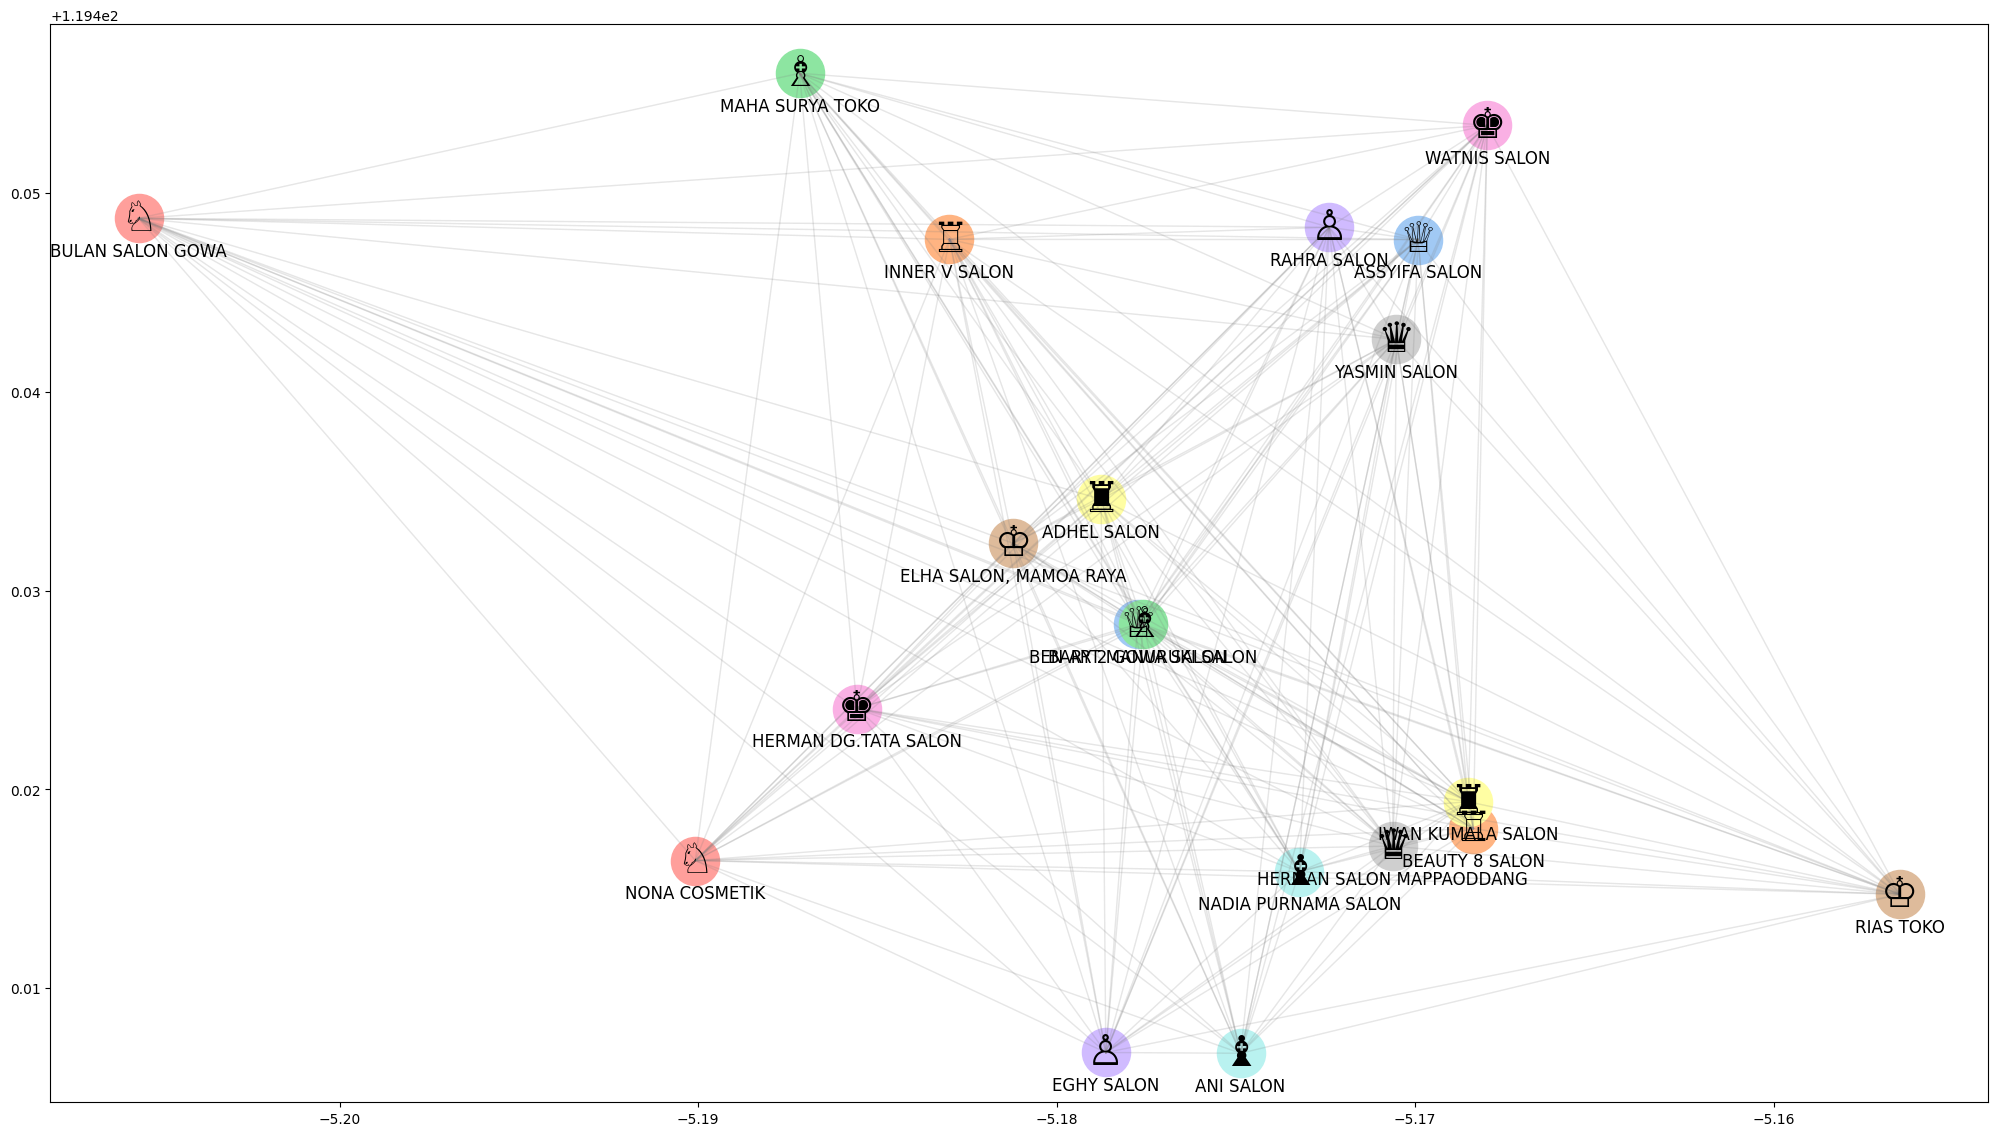

In [ ]:
# Pastel Pallete
colors = sns.color_palette("pastel", len(cities_names))

# City Icons
city_icons = {
    "ASSYIFA SALON": "♕", "INNER V SALON": "♖","MAHA SURYA TOKO": "♗", "NONA COSMETIK": "♘", "RAHRA SALON": "♙",
    "RIAS TOKO": "♔", "WATNIS SALON": "♚", "YASMIN SALON": "♛", "ADHEL SALON": "♜","ANI SALON": "♝", "BARY 2 GOWA SALON": "♕" ,"BEAUTY 8 SALON": "♖",
    "BEN ART MANURUKI SALON": "♗", "BULAN SALON GOWA": "♘","EGHY SALON": "♙","ELHA SALON, MAMOA RAYA": "♔","HERMAN DG.TATA SALON": "♚",
    "HERMAN SALON MAPPAODDANG": "♛","IWAN KUMALA SALON": "♜","NADIA PURNAMA SALON": "♝",
}

fig, ax = plt.subplots()

ax.grid(False)  # Grid

for i, (city, (city_x, city_y)) in enumerate(city_coords.items()):
    color = colors[i]
    icon = city_icons[city]
    ax.scatter(city_x, city_y, c=[color], s=1200, zorder=1)
    ax.annotate(icon, (city_x, city_y), fontsize=30, ha='center', va='center', zorder=3)
    ax.annotate(city, (city_x, city_y), fontsize=12, ha='center', va='bottom', xytext=(0, -30),
                textcoords='offset points')

    # Connect cities with opaque lines
    for j, (other_city, (other_x, other_y)) in enumerate(city_coords.items()):
        if i != j:
            ax.plot([city_x, other_x], [city_y, other_y], color='gray', linestyle='-', linewidth=1, alpha=0.1)

fig.set_size_inches(25, 14)
plt.show()

## Population Function (Random Initialization)

In [ ]:
def initial_population(cities_names, n_population):
    """
    Generating initial population of cities randomly selected from all possible permutations
    of the given cities.

    Args:
    - cities_names (list): List of city names
    - n_population (int): Number of individuals in the population

    Returns:
    - population_perms (list): List of initial population of cities
    """
    cities_list = list(cities_names)
    population_perms = []

    for _ in range(n_population):
        perm = list(np.random.permutation(cities_list))
        population_perms.append(perm)

    return population_perms

## Distance between two cities

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = 6371 * c  # Radius of the Earth in kilometers
    return distance

In [ ]:
def dist_two_cities(city1, city2):
    # Get coordinates of the two cities
    lat1, lon1 = city_coords[city1]
    lat2, lon2 = city_coords[city2]

    # Calculate the distance between the two cities
    distance = haversine_distance(lat1, lon1, lat2, lon2)
    return distance


In [ ]:
# Create a matrix to store distances
distance_matrix = [[0 for _ in range(len(x))] for _ in range(len(x))]

# Calculate distances between each pair of coordinates
for i in range(len(x)):
    for j in range(len(x)):
        lat1, lon1 = city_coords[cities_names[i]]
        lat2, lon2 = city_coords[cities_names[j]]
        distance_matrix[i][j] = haversine_distance(lat1, lon1, lat2, lon2)

# Convert distances in the matrix to kilometers
for i in range(len(x)):
    for j in range(len(x)):
        distance_matrix[i][j] = round(distance_matrix[i][j], 2)  # Round to 2 decimal places

# Print the distance matrix
for i in range(len(x)):
    for j in range(len(x)):
        print(f"Distance from {cities_names[i]} to {cities_names[j]}:", distance_matrix[i][j], "km")

Distance from ASSYIFA SALON to ASSYIFA SALON: 0.0 km
Distance from ASSYIFA SALON to INNER V SALON: 1.45 km
Distance from ASSYIFA SALON to MAHA SURYA TOKO: 2.13 km
Distance from ASSYIFA SALON to NONA COSMETIK: 4.12 km
Distance from ASSYIFA SALON to RAHRA SALON: 0.28 km
Distance from ASSYIFA SALON to RIAS TOKO: 3.94 km
Distance from ASSYIFA SALON to WATNIS SALON: 0.67 km
Distance from ASSYIFA SALON to YASMIN SALON: 0.56 km
Distance from ASSYIFA SALON to ADHEL SALON: 1.75 km
Distance from ASSYIFA SALON to ANI SALON: 4.57 km
Distance from ASSYIFA SALON to BARY 2 GOWA SALON: 2.31 km
Distance from ASSYIFA SALON to BEAUTY 8 SALON: 3.29 km
Distance from ASSYIFA SALON to BEN ART MANURUKI SALON: 2.31 km
Distance from ASSYIFA SALON to BULAN SALON GOWA: 3.97 km
Distance from ASSYIFA SALON to EGHY SALON: 4.63 km
Distance from ASSYIFA SALON to ELHA SALON, MAMOA RAYA: 2.11 km
Distance from ASSYIFA SALON to HERMAN DG.TATA SALON: 3.14 km
Distance from ASSYIFA SALON to HERMAN SALON MAPPAODDANG: 3.38 km


## Total distance traveled by individual

In [ ]:
def total_dist_individual(individual):

    """
    Calculating the total distance traveled by individual,
    one individual means one possible solution (1 permutation)
    Input:
    1- Individual list of cities
    Output:
    Total distance traveled
    """

    total_dist = 0
    for i in range(0, len(individual)):
        if(i == len(individual) - 1):
            total_dist += dist_two_cities(individual[i], individual[0])
        else:
            total_dist += dist_two_cities(individual[i], individual[i+1])
    return total_dist

## Fitness probability function

In [ ]:
def fitness_prob(population):
    """
    Calculating the fitness probability
    Input:
    1- Population
    Output:
    Population fitness probability
    """
    total_dist_all_individuals = []
    for i in range(0, len(population)):
        total_dist_all_individuals.append(total_dist_individual(population[i]))

    max_population_cost = max(total_dist_all_individuals)
    population_fitness = max_population_cost - total_dist_all_individuals
    population_fitness_sum = sum(population_fitness)
    population_fitness_probs = population_fitness / population_fitness_sum
    return population_fitness_probs

## Roulette wheel

In [ ]:
def roulette_wheel(population, fitness_probs):
    """
    Implement selection strategy based on roulette wheel proportionate selection.
    Input:
    1- population
    2- fitness probabilities
    Output:
    selected individual
    """
    population_fitness_probs_cumsum = fitness_probs.cumsum()
    bool_prob_array = population_fitness_probs_cumsum < np.random.uniform(0,1,1)
    selected_individual_index = len(bool_prob_array[bool_prob_array == True]) - 1
    return population[selected_individual_index]

## Crossover

In [ ]:
def crossover(parent_1, parent_2):
    """
    Implement mating strategy using simple crossover between 2 parents
    Input:
    1- parent 1
    2- parent 2
    Output:
    1- offspring 1
    2- offspring 2
    """
    n_cities_cut = len(cities_names) - 1
    cut = round(random.uniform(1, n_cities_cut))
    offspring_1 = []
    offspring_2 = []

    offspring_1 = parent_1[0:cut]
    offspring_1 += [city for city in parent_2 if city not in offspring_1]


    offspring_2 = parent_2[0:cut]
    offspring_2 += [city for city in parent_1 if city not in offspring_2]


    return offspring_1, offspring_2


## Mutation

In [ ]:
def mutation(offspring):
    """
    Implement mutation strategy in a single offspring
    Input:
    1- offspring individual
    Output:
    1- mutated offspring individual
    """
    n_cities_cut = len(cities_names) - 1
    index_1 = round(random.uniform(0,n_cities_cut))
    index_2 = round(random.uniform(0,n_cities_cut))

    temp = offspring[index_1]
    offspring[index_1] = offspring[index_2]
    offspring[index_2] = temp
    return(offspring)


## Algorithm

1. Implement the described GA algorithm to solve the traveling salesman problem.
Use a map of cities provided e.g. N = 10 and the GA parameters:
P = 250, n = 0.8, p m = 0.2, T max = 1000. What was the minimal total distance
traveled? What is the sequence of cities to be visited ensuring the minimal
total distance traveled?
2. Investigation the influence of parameters P, n and p m on the mean minimal total
distance traveled calculated for 10 trials. Change the values of P within a set
{100, 300, 500}, n ∈ {0.5, 0.7, 0.9} and p m ∈ {0.1, 0.3, 0.5}.

# Algorithm

In [ ]:
def run_ga(cities_names, n_population, n_generations, crossover_per, mutation_per):

    population = initial_population(cities_names, n_population)
    fitness_probs = fitness_prob(population)

    parents_list = []
    for i in range(0, int(crossover_per * n_population)):
        parents_list.append(roulette_wheel(population, fitness_probs))

    offspring_list = []
    for i in range(0,len(parents_list), 2):
        offspring_1, offspring_2 = crossover(parents_list[i], parents_list[i+1])

    #     print(offspring_1)
    #     print(offspring_2)
    #     print()

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_1 = mutation(offspring_1)
    #         print("Offspring 1 mutated", offspring_1)

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_2 = mutation(offspring_2)
    #         print("Offspring 2 mutated", offspring_2)


        offspring_list.append(offspring_1)
        offspring_list.append(offspring_2)

    mixed_offspring = parents_list + offspring_list

    fitness_probs = fitness_prob(mixed_offspring)
    sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
    best_fitness_indices = sorted_fitness_indices[0:n_population]
    best_mixed_offsrping = []
    for i in best_fitness_indices:
        best_mixed_offsrping.append(mixed_offspring[i])

    for i in range(0, n_generations):
        # if (i%10 == 0):
            # print("Generation: ", i)

        fitness_probs = fitness_prob(best_mixed_offsrping)
        parents_list = []
        for i in range(0, int(crossover_per * n_population)):
            parents_list.append(roulette_wheel(best_mixed_offsrping, fitness_probs))

        offspring_list = []
        for i in range(0,len(parents_list), 2):
            offspring_1, offspring_2 = crossover(parents_list[i], parents_list[i+1])

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_1 = mutation(offspring_1)

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_2 = mutation(offspring_2)

            offspring_list.append(offspring_1)
            offspring_list.append(offspring_2)

        mixed_offspring = parents_list + offspring_list
        fitness_probs = fitness_prob(mixed_offspring)
        sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
        best_fitness_indices = sorted_fitness_indices[0:int(0.8*n_population)]

        best_mixed_offsrping = []
        for i in best_fitness_indices:
            best_mixed_offsrping.append(mixed_offspring[i])

        old_population_indices = [random.randint(0, (n_population - 1)) for j in range(int(0.2*n_population))]
        for i in old_population_indices:
#             print(i)
            best_mixed_offsrping.append(population[i])

        random.shuffle(best_mixed_offsrping)

    return best_mixed_offsrping

In [ ]:
best_mixed_offsrping = run_ga(cities_names, n_population, n_generations, crossover_per, mutation_per)

In [ ]:
total_dist_all_individuals = []
for i in range(0, n_population):
    total_dist_all_individuals.append(total_dist_individual(best_mixed_offsrping[i]))

In [ ]:
index_minimum = np.argmin(total_dist_all_individuals)

### Optimum Solution

In [ ]:
minimum_distance = min(total_dist_all_individuals)
minimum_distance

21.112537555113565

# Shortest Path

In [ ]:
# shortest_path = offspring_list[index_minimum]
shortest_path = best_mixed_offsrping[index_minimum]
shortest_path

['WATNIS SALON',
 'ASSYIFA SALON',
 'YASMIN SALON',
 'ADHEL SALON',
 'ELHA SALON, MAMOA RAYA',
 'BARY 2 GOWA SALON',
 'BEN ART MANURUKI SALON',
 'NADIA PURNAMA SALON',
 'HERMAN SALON MAPPAODDANG',
 'BEAUTY 8 SALON',
 'IWAN KUMALA SALON',
 'RIAS TOKO',
 'ANI SALON',
 'EGHY SALON',
 'NONA COSMETIK',
 'HERMAN DG.TATA SALON',
 'BULAN SALON GOWA',
 'MAHA SURYA TOKO',
 'INNER V SALON',
 'RAHRA SALON']

### Optimum Solution Visualization

In [ ]:
x_shortest = []
y_shortest = []
for city in shortest_path:
    x_value, y_value = city_coords[city]
    x_shortest.append(x_value)
    y_shortest.append(y_value)

x_shortest.append(x_shortest[0])
y_shortest.append(y_shortest[0])

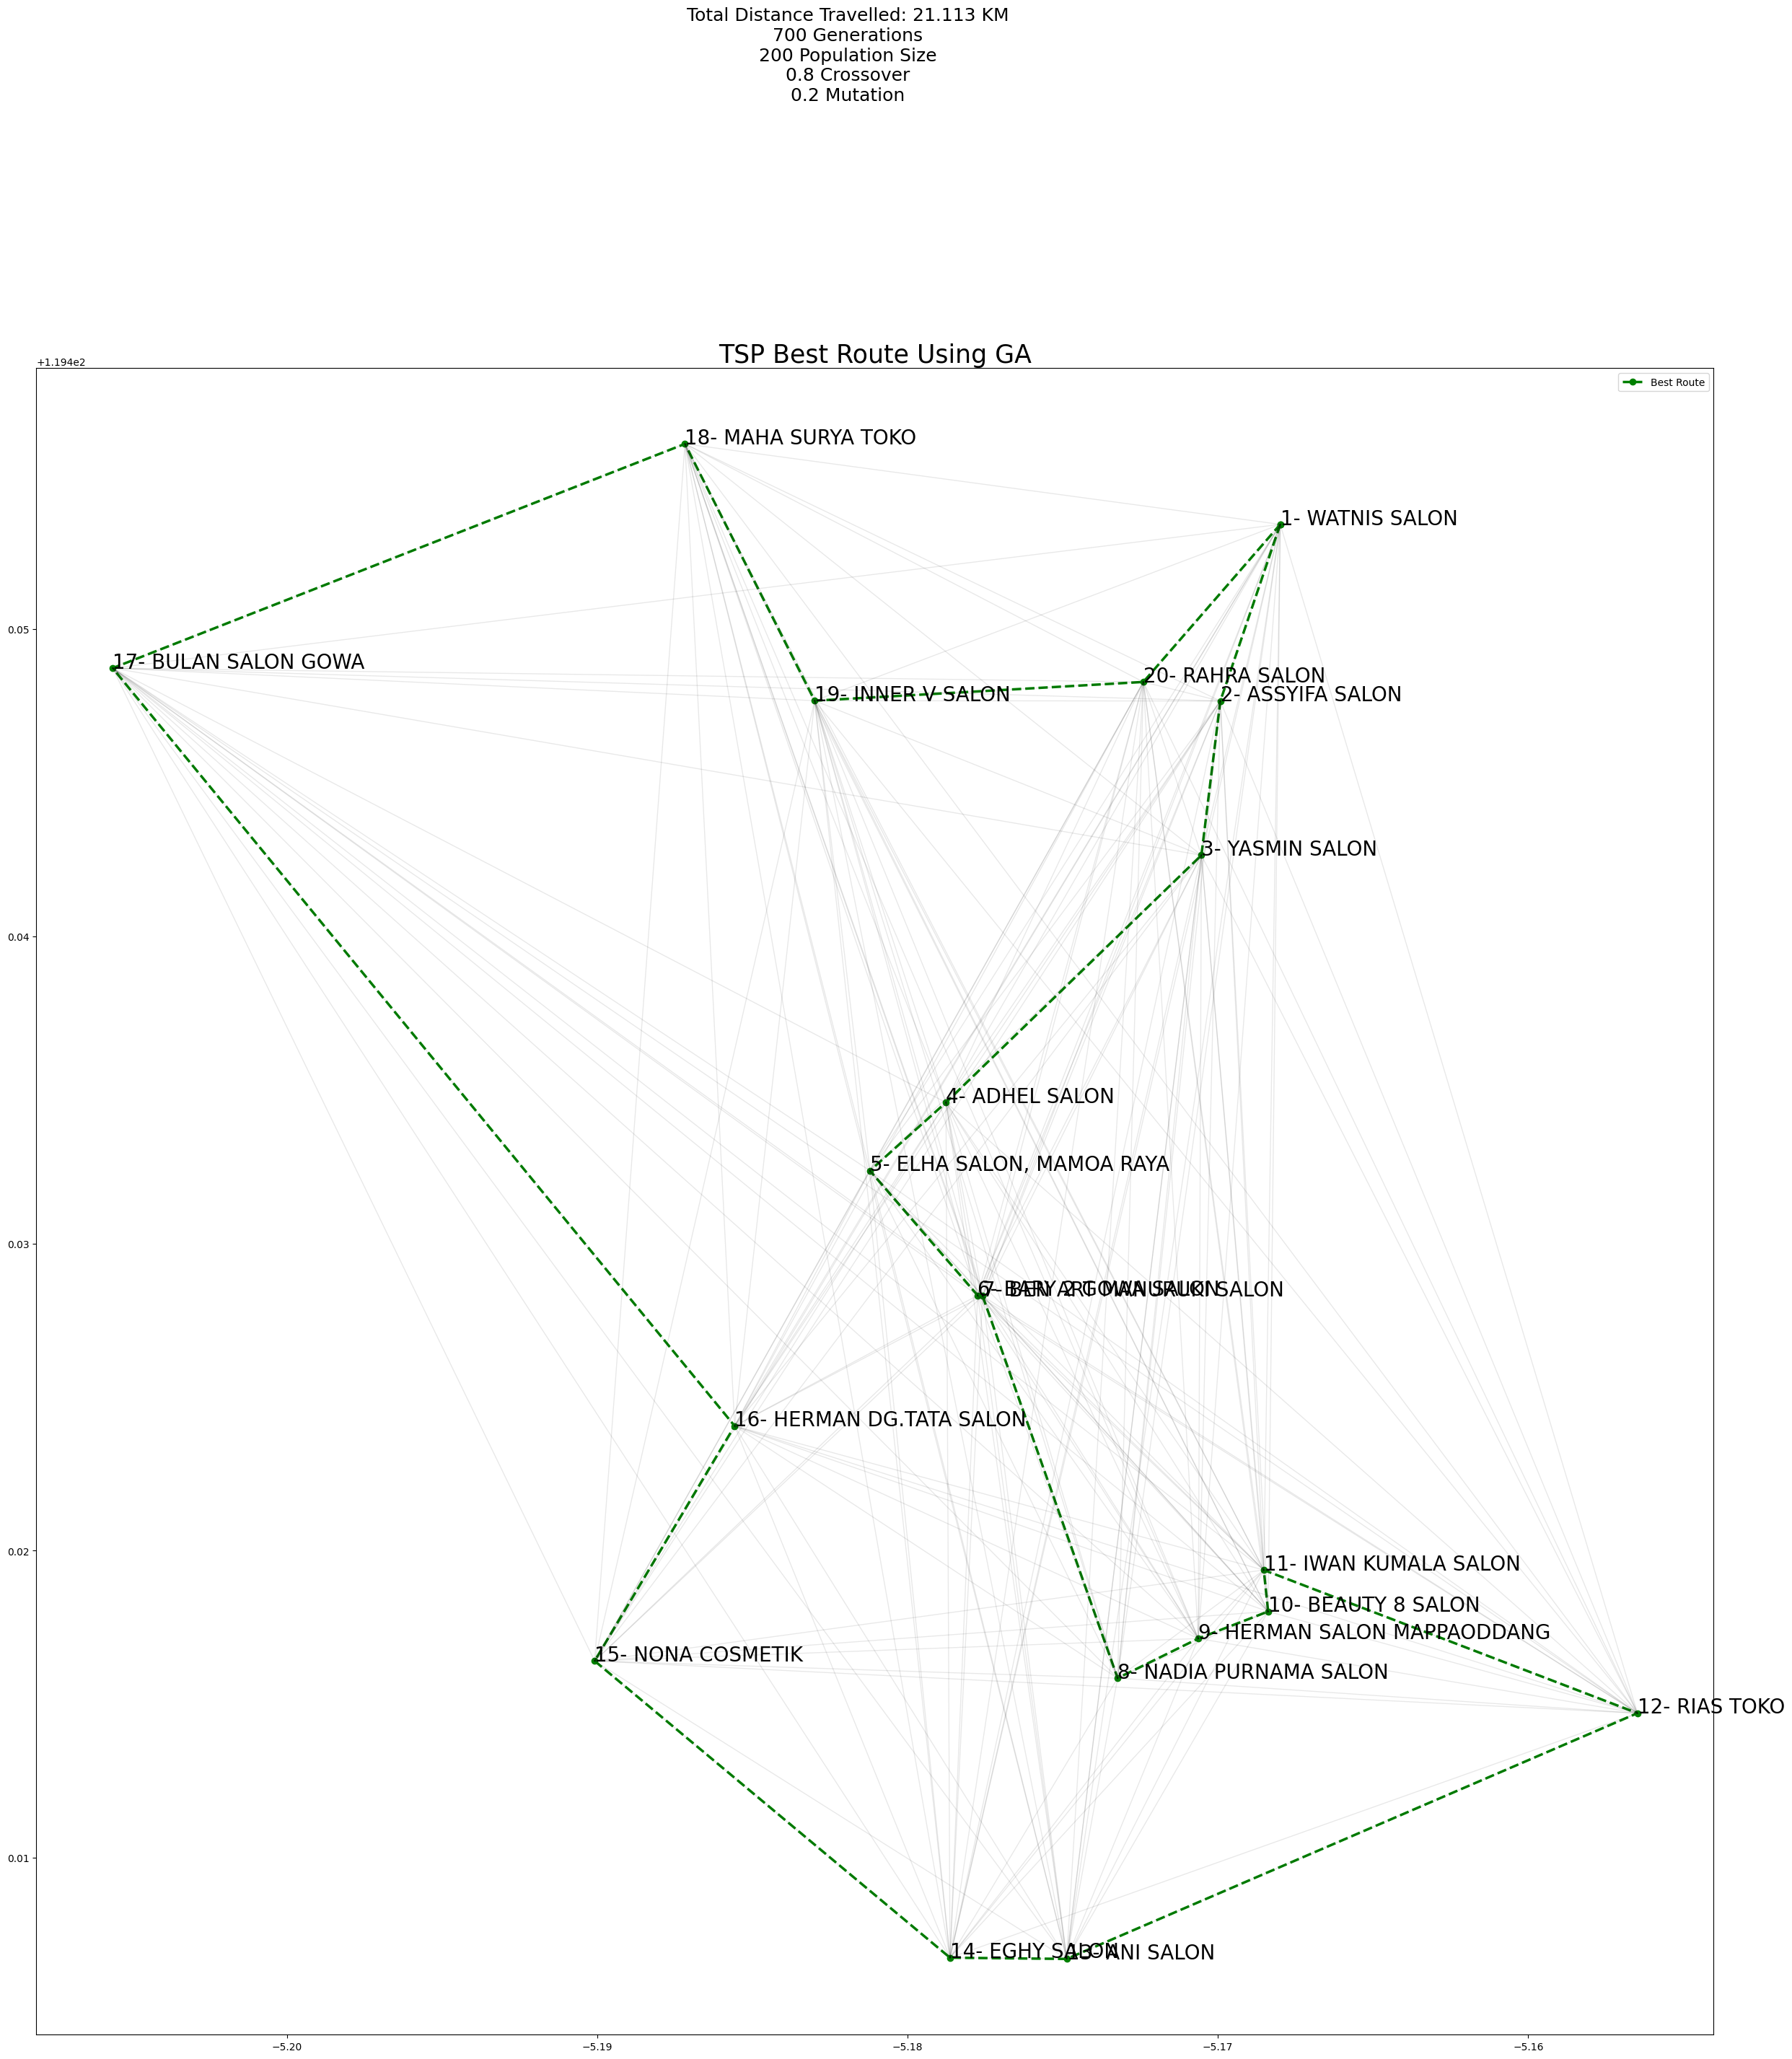

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_shortest, y_shortest, '--go', label='Best Route', linewidth=2.5)
plt.legend()

for i in range(len(x)):
    for j in range(i + 1, len(x)):
        ax.plot([x[i], x[j]], [y[i], y[j]], 'k-', alpha=0.09, linewidth=1)

plt.title(label="TSP Best Route Using GA",
          fontsize=25,
          color="k")

str_params = '\n'+str(n_generations)+' Generations\n'+str(n_population)+' Population Size\n'+str(crossover_per)+' Crossover\n'+str(mutation_per)+' Mutation'
plt.suptitle("Total Distance Travelled: "+
             str(round(minimum_distance, 3)) + " KM" +
             str_params, fontsize=18, y = 1.047)

for i, txt in enumerate(shortest_path):
    ax.annotate(str(i+1)+ "- " + txt, (x_shortest[i], y_shortest[i]), fontsize= 20)

fig.set_size_inches(30, 30)
# plt.grid(color='k', linestyle='dotted')
plt.savefig('solution.png')
plt.show()